In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [62]:
import os
import json
import glob
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


MONTH = [ 'Sep_2020', "Oct_2020", 'Nov_2020', 'Dec_2020', 'Aug_2020'] 

DIR = '/content/gdrive/MyDrive/Colab/COMS6998EMODS/Hydrated_Tweets_All_Attributes/'
all_id = {}

total_dic={"0":0, "1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,
"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0}

merged_df = []
for month in MONTH:

  month_dir = DIR + month + "/*"
  files = glob.glob(month_dir)

  files = sorted(files)
  #files = files[:1]
  print(month)
  for file in tqdm(files):
    df = pd.read_csv(file, sep=',', engine='python')
    for index, row in df.iterrows():
      time_str = row['created_at'].split(" ")[-1].split(":")[0]
      if len(time_str) > 2:
        continue
      hour = str(int(time_str))
      total_dic[hour] += 1
      all_id[str((row['id'])).replace(" ", "")] = hour
total_dic

Sep_2020


  0%|          | 0/30 [00:00<?, ?it/s]

Oct_2020


  0%|          | 0/31 [00:00<?, ?it/s]

Nov_2020


  0%|          | 0/30 [00:00<?, ?it/s]

Dec_2020


  0%|          | 0/31 [00:00<?, ?it/s]

Aug_2020


  0%|          | 0/31 [00:00<?, ?it/s]

{'0': 30162,
 '1': 30776,
 '10': 8040,
 '11': 13503,
 '12': 20356,
 '13': 25484,
 '14': 29156,
 '15': 32089,
 '16': 32159,
 '17': 31888,
 '18': 30354,
 '19': 30933,
 '2': 27806,
 '20': 30574,
 '21': 30451,
 '22': 30654,
 '23': 30566,
 '3': 23871,
 '4': 19199,
 '5': 13143,
 '6': 8901,
 '7': 5970,
 '8': 4828,
 '9': 5254}

In [63]:
cnt = 0
for value in total_dic.values():
  cnt += value
cnt

546117

In [47]:
MONTH = [ 'Sep_2020', "Oct_2020", 'Nov_2020', 'Dec_2020', 'Aug_2020'] 

DIR = '/content/gdrive/MyDrive/Colab/COMS6998EMODS/Hyderated_Tweets_Hate_Indicator/'
all_id = {}
k = 0
merged_df = []
for month in MONTH:

  month_dir = DIR + month + "/*"
  files = glob.glob(month_dir)

  files = sorted(files)
  print(month)
  for file in tqdm(files):
    df = pd.read_csv(file, sep=',', engine='python')
    k += df.shape[0]
k

Sep_2020


  0%|          | 0/30 [00:00<?, ?it/s]

Oct_2020


  0%|          | 0/31 [00:00<?, ?it/s]

Nov_2020


  0%|          | 0/30 [00:00<?, ?it/s]

Dec_2020


  0%|          | 0/31 [00:00<?, ?it/s]

Aug_2020


  0%|          | 0/31 [00:00<?, ?it/s]

544664

In [57]:
with open('/content/gdrive/MyDrive/Colab/COMS6998EMODS/file.txt', 'w') as file:
     file.write(json.dumps(all_id)) 

In [96]:
hate_dic ={"0":0, "1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,
"13":0,"14":0,"15":0,"16":0,"17":0,"18":0,"19":0,"20":0,"21":0,"22":0,"23":0}

miss = 0
DIR = '/content/gdrive/MyDrive/Colab/COMS6998EMODS/Hate_Tweet_0.01/*'
files = glob.glob(DIR)
for file in tqdm(files):
  df = pd.read_csv(file)
  # print(file, df.shape)
  for index, row in df.iterrows():
    id = str(row['id']).replace(" ", "")
    
    if id not in all_id.keys():
      miss += 1
      print(id, row['date'])
      continue

    hour = all_id[id]
    hate_dic[hour] += 1
hate_dic
miss

  0%|          | 0/59 [00:00<?, ?it/s]

0

In [91]:
hate_dic

{'0': 2214,
 '1': 2361,
 '10': 658,
 '11': 1032,
 '12': 1456,
 '13': 1847,
 '14': 2167,
 '15': 2299,
 '16': 2294,
 '17': 2315,
 '18': 2156,
 '19': 2163,
 '2': 2148,
 '20': 2126,
 '21': 2239,
 '22': 2193,
 '23': 2251,
 '3': 1870,
 '4': 1467,
 '5': 1038,
 '6': 797,
 '7': 517,
 '8': 456,
 '9': 471}

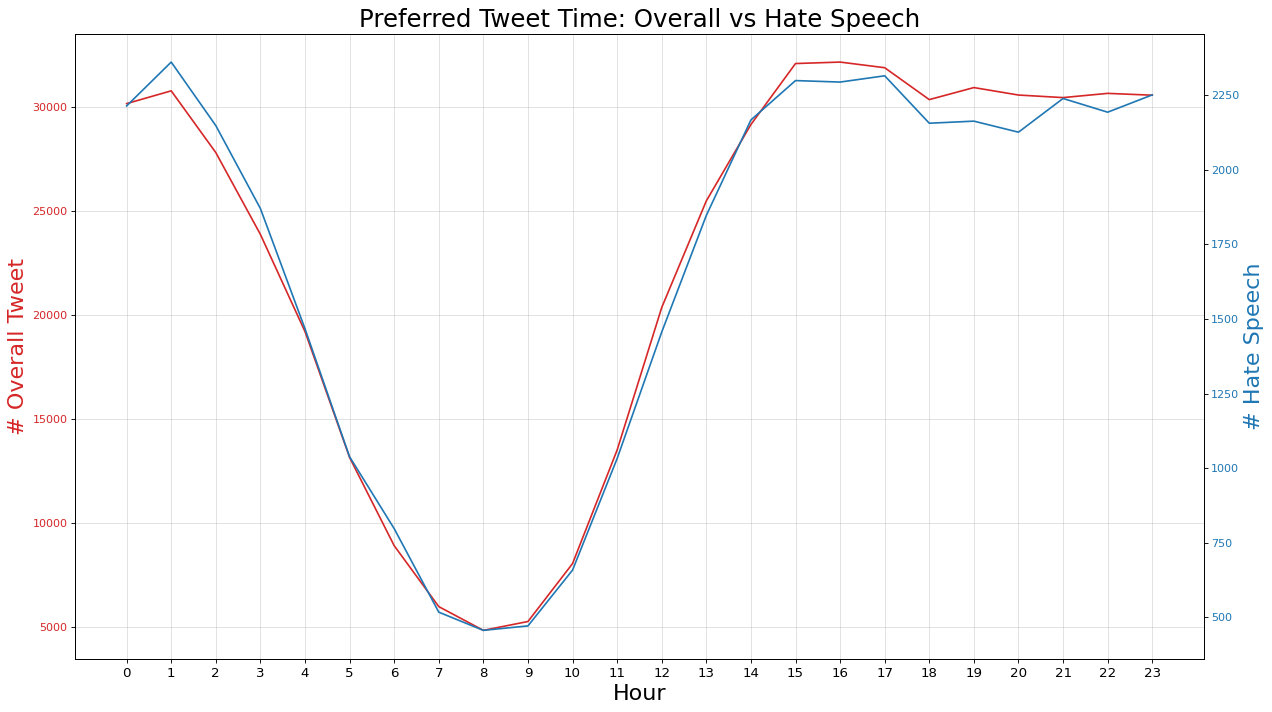

In [95]:
x = []
y1 = []
y2 = []
for i in range(24):
  x.append(i)
  y1.append(total_dic[str(i)])
  y2.append(hate_dic[(str(i))])

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Hour', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('# Overall Tweet', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)



# ax2 (right Y axis)
ax2.set_ylabel("# Hate Speech", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x)))
ax2.set_xticklabels(x[:], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Preferred Tweet Time: Overall vs Hate Speech", fontsize=22)
fig.tight_layout()
plt.savefig('/content/gdrive/MyDrive/Colab/COMS6998EMODS/preferred_time.jpg')
plt.show()

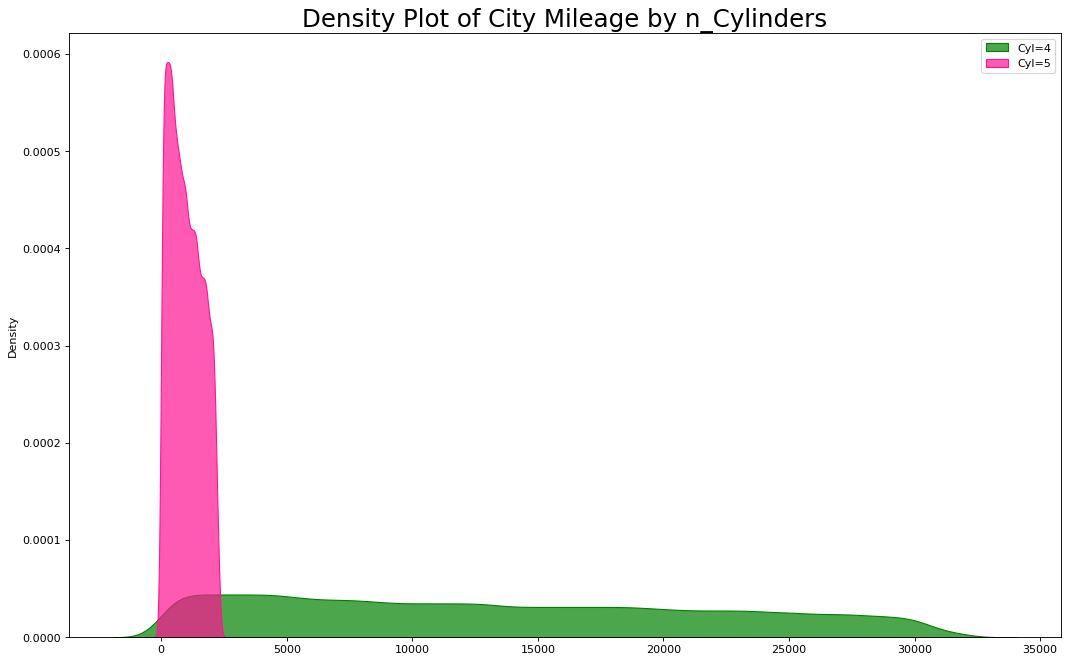

In [72]:
import seaborn as sns

T, H = [], []
for key, value in total_dic.items():
  for _ in range(int(value)):
    T.append(int(_))

for key, value in hate_dic.items():
  for _ in range(int(value)):
    H.append(int(_))

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(T, shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(H, shade=True, color="deeppink", label="Cyl=5", alpha=.7)


# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

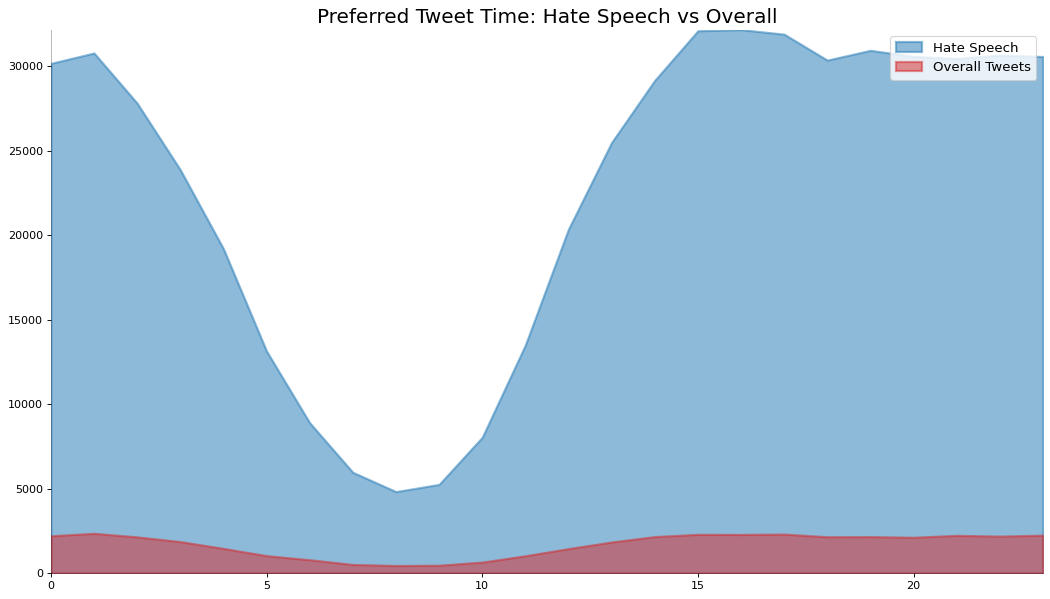

In [70]:
import numpy as np


# Prepare Data
x = []
y1 = []
y2 = []
for i in range(24):
  x.append(i)
  y1.append(total_dic[str(i)])
  y2.append(hate_dic[(str(i))])

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['Overall Tweets', 'Hate Speech']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Preferred Tweet Time: Hate Speech vs Overall', fontsize=18)
ax.set(ylim=[0, max(y1)])
ax.legend(loc='best', fontsize=12)
# plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
# plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(0, x[-1])

# Draw Tick lines  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()